# Project 3

In this project, you will perform a logistic regression on the admissions data we've been working with in projects 1 and 2.

In [173]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np

In [174]:
df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna() 
print df.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Part 1. Frequency Tables

#### 1. Let's create a frequency table of our variables

In [175]:
# frequency table for prestige and whether or not someone was admitted
df_frequency = df.groupby('prestige').size().reset_index(name='Count').rename(columns={'Col1':'Col_value'})
print (df_frequency)

   prestige  Count
0       1.0     61
1       2.0    148
2       3.0    121
3       4.0     67


In [176]:
pd.crosstab(df["admit"],df["prestige"])

prestige,1.0,2.0,3.0,4.0
admit,,,,
0,28,95,93,55
1,33,53,28,12


1 = Admit, 0 = Not admit 

### Part 2. Return of dummy variables

#### 2.1 Create class or dummy variables for prestige 

In [177]:
# dummify rank to handle categorical variables
dummy_ranks = pd.get_dummies(df['prestige'], prefix='prestige')
print dummy_ranks.head()

   prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0             0             0             1             0
1             0             0             1             0
2             1             0             0             0
3             0             0             0             1
4             0             0             0             1


#### 2.2 When modeling our class variables, how many do we need? 



> three dummy variables for prestige, and one for GRE and GPA. Total of 5. 

### Answer: 3

## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

In [178]:
cols_to_keep = ['admit', 'gre', 'gpa']
handCalc = df[cols_to_keep].join(dummy_ranks.loc[:, 'prestige_1':])
print handCalc.head()

   admit    gre   gpa  prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61             0             0             1             0
1      1  660.0  3.67             0             0             1             0
2      1  800.0  4.00             1             0             0             0
3      1  640.0  3.19             0             0             0             1
4      0  520.0  2.93             0             0             0             1


In [179]:
#crosstab prestige 1 admission 
pd.crosstab(handCalc["admit"],handCalc["prestige_1.0"])
# frequency table cutting prestige and whether or not someone was admitted
# df_frequency1 = df.groupby('prestige').size().reset_index(name='Count').rename(columns={'Col1':'Col_value'})
# print (df_frequency1)

prestige_1.0,0,1
admit,,
0,243,28
1,93,33


#### 3.1 Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college

In [ ]:
1.1785

#### 3.2 Now calculate the odds of admission if you did not attend a #1 ranked college

In [ ]:
0.383

#### 3.3 Calculate the odds ratio

odds ratio = odds of admission if attended a #1 ranked college/odds of admission if not attended 
> = 3.07

#### 3.4 Write this finding in a sentence: 

Answer: You are 3 times more likely to get admitted into graduate school if you did NOT attend a #1 ranked college. 

#### 3.5 Print the cross tab for prestige_4

In [180]:
pd.crosstab(handCalc["admit"],handCalc["prestige_4.0"])

prestige_4.0,0,1
admit,,
0,216,55
1,114,12


#### 3.6 Calculate the OR 

odds ratio = odds of admission if you attended a #4 ranked college/odds of admission if you did not attend
> = 0.414

#### 3.7 Write this finding in a sentence

Answer: The likelihood of admission into graduate schoolis less than half (0.414) if you had attended a #4 ranked college. 

## Part 4. Analysis

In [225]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.loc[:, 'prestige_2':])
print data.head()

   admit    gre   gpa  prestige_2  prestige_3  prestige_4
0      0  380.0  3.61           0           0           0
1      1  660.0  3.67           1           0           0
2      1  800.0  4.00           0           1           0
3      1  640.0  3.19           0           0           1
4      0  520.0  2.93           0           0           0


We're going to add a constant term for our Logistic Regression. The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [226]:
# manually add the intercept
data['intercept'] = 1.0

#### 4.1 Set the covariates to a variable called train_cols

In [227]:
train_cols = data.columns[1:]

In [228]:
train_cols

Index([u'gre', u'gpa', u'prestige_2', u'prestige_3', u'prestige_4',
       u'intercept'],
      dtype='object')

#### 4.2 Fit the model

In [229]:
logit = sm.Logit(data['admit'], data[train_cols])

In [230]:
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.597847
         Iterations 5


#### 4.3 Print the summary results

In [231]:
 print result.summary()

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Fri, 30 Jun 2017   Pseudo R-squ.:                 0.04326
Time:                        13:46:27   Log-Likelihood:                -237.35
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 0.0006619
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gre            0.0025      0.001      2.379      0.017       0.000       0.005
gpa            0.7082      0.323      2.192      0.028       0.075       1.341
prestige_2     0.3664      0.320      1.144      0.2

#### 4.4 Calculate the odds ratios of the coeffiencents and their 95% CI intervals

hint 1: np.exp(X)

hint 2: conf['OR'] = params
        
           conf.columns = ['2.5%', '97.5%', 'OR']

In [232]:
data.loc[0]

admit           0.00
gre           380.00
gpa             3.61
prestige_2      0.00
prestige_3      0.00
prestige_4      0.00
intercept       1.00
Name: 0, dtype: float64

In [233]:
lm.params

Intercept    -4.930441
gre           0.002532
gpa           0.708179
prestige_2    0.366359
prestige_3    0.441211
prestige_4    0.087057
dtype: float64

In [234]:
print (np.exp(lm.params))

Intercept     0.007223
gre           1.002535
gpa           2.030291
prestige_2    1.442473
prestige_3    1.554588
prestige_4    1.090959
dtype: float64


In [235]:
params = lm.params
conf = lm.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print np.exp(conf)

                2.5%     97.5%        OR
Intercept   0.000850  0.061401  0.007223
gre         1.000446  1.004629  1.002535
gpa         1.077936  3.824050  2.030291
prestige_2  0.770098  2.701901  1.442473
prestige_3  0.834597  2.895704  1.554588
prestige_4  0.573404  2.075661  1.090959


#### 4.5 Interpret the OR of Prestige_2

Answer: The likelihood of being admitted into graduate school increases by 1.44 times if you had graduated from a #2 ranked college.

#### 4.6 Interpret the OR of GPA

Answer: For every point increase in GPA, the likelihood of being admitted increases by two times. 

## Part 5: Predicted probablities


As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values. This will allow us to see how the predicted probability of admission increases/decreases across different variables. First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa". This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

In [197]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [198]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
print gres
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])
gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
print gpas
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])


# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))


[ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]
[ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]


#### 5.1 Recreate the dummy variables

In [202]:
# recreate the dummy variables
combos.columns = ['gre','gpa','prestige','intercept']

dummy_ranks = pd.get_dummies(combos['prestige'],prefix='prestige')

dummy_ranks.columns = ['prestige_1','prestige_2','prestige_3','prestige_4']

dummy_ranks
# keep only what we need for making predictions

cols_to_keep = ['gre','gpa','prestige','intercept']
combos = combos[cols_to_keep].join(dummy_ranks.loc[:,'prestige2':])

#### 5.2 Make predictions on the enumerated dataset

In [236]:
combos['admit_pred'] = result.predict(combos[train_cols])

In [239]:
combos.tail(4)

,gre,gpa,prestige,intercept,prestige_1,prestige_2,prestige_3,prestige_4,admit_pred
396,800.0,4.0,1.0,1.0,1,0,0,0,0.481988
397,800.0,4.0,2.0,1.0,0,1,0,0,0.573043
398,800.0,4.0,3.0,1.0,0,0,1,0,0.591249
399,800.0,4.0,4.0,1.0,0,0,0,1,0.503744


#### 5.3 Interpret findings for the last 4 observations

Answer: The probability of admission for these observations range from 48 to 59%. (Side question: I notice that #3 ranked college is associated with the best chance of admission, and also has the strongest correlation - from the previous two projects. Is that true?)

## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.

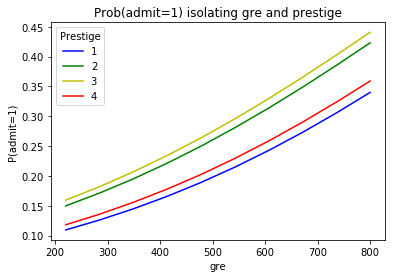

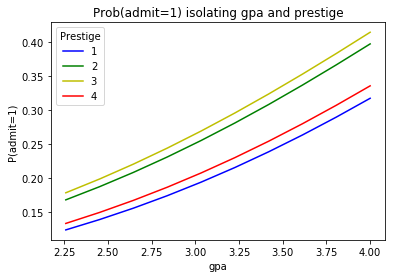

In [243]:
def isolate_and_plot(variable):
      # isolate gre and class rank
      grouped = pd.pivot_table(combos, values=['admit_pred'], index=[variable, 'prestige'],
                  aggfunc=np.mean)
      # make a plot
      colors = 'rbgyrbgy'
      for col in combos.prestige.unique():
          plt_data = grouped.loc[grouped.index.get_level_values(1)==col]
          pl.plot(plt_data.index.get_level_values(0), plt_data['admit_pred'], color=colors[int(col)])

      pl.xlabel(variable)
      pl.ylabel("P(admit=1)")
      pl.legend(['1', '2', '3', '4'], loc='upper left', title='Prestige')
      pl.title("Prob(admit=1) isolating " + variable + " and prestige")
      pl.show()

isolate_and_plot('gre')

isolate_and_plot('gpa')

I drew a lot of help from yhat's blog (disclaimer)